In [2]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_row", 500)

In [16]:
def plot_scores(score_df, metric, score_type, title="", save_folder="", col_order=None, hue_order=None):

    palette = {"Ridge":"C0", "Multitask Ridge": "C0", "PLS": "C1", "Random Forest": "C2", "CCA": "C4", "Neural Network": "C4",
               "Neural Network (Linear)": "C5", "SVR-RBF": "C7", "XGBoost": "C6"}
    
    
    
    g = sns.catplot(x="Domain", y="Score", hue="Model", palette=palette,
                    data=score_df, ci="sd", kind="bar", hue_order=hue_order,
                    row_order=[100.0, 80.0, 60.0, 40.0, 20.0])

#     g.set_axis_labels("", "$R^2$", 20)

    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black", linewidth=2)
        
        if score_type == "Out-of-sample":
            ax.axhline(0.1, color="black", linewidth=1)
#             ax.axhline(0.05, color="black", linewidth=1)
        else:
            ax.axhline(0.2, color="black", linewidth=1)    
        ax.set_ylabel("$R^2$", fontsize=15)
        ax.set_xlabel("")
        
#         for patch in ax.patches :
#             current_width = patch.get_width()
#             print(current_width)

#             # we change the bar width
#             patch.set_width(new_value)
        

    g.fig.suptitle(title, y=1.15, fontsize=24)
    
    if metric == "R2" and score_type == "Out-of-sample":
        g.set(ylim=(-0.2, 0.2))
#         plt.savefig(save_folder + title, bbox_inches="tight")
#         pass
        
    if metric == "R2" and (score_type == "In-sample" or score_type == "In-sample (original)"):
        g.set(ylim=(-0.1, 1.1))
        
    if metric == "MAE":
        g.set(ylim=(0.0, 1.6))
        
    
    if metric == "R2" and (score_type == "In-sample" or score_type == "Out-of-sample"):
        plt.savefig(save_folder + title + "_" + metric + "_" + score_type, bbox_inches="tight")

    plt.show()

def plot_all_scores(score_df, title_prefix="", save_folder="", col_order=None, hue_order=None):   

    score_df = score_df[score_df["Data mul factor"] == "No mixup"]
    score_df = score_df[score_df["Metric"] == "R2"]
    
    
#     for metric in score_df["Metric"].unique():
    metric = "R2"

    for score_type in score_df["Score type"].unique():

#         filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type)]
        filtered_data = score_df[(score_df["Score type"] == score_type)]
        
        print(filtered_data.groupby(["Domain", "Model"])["Score"].describe()[['mean','std']])

#             title = title_prefix + metric + " - " + score_type
#             title = "Multi Outcome Models"

        plot_scores(filtered_data, metric, score_type, title_prefix, save_folder, col_order=col_order, hue_order=hue_order)

In [6]:
results_path = "/Users/hasnainmamdani/Academics/McGill/thesis/stroke-impairment-analysis/regression/results/unfiltered_all_1401n/"

## Single output

In [3]:
ridge = pd.read_hdf(results_path + 'singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_ridge_all.h5', key='p', mode='r')
bpridge = pd.read_hdf(results_path + 'singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_ridge_all.h5', key='p', mode='r')

svr = pd.read_hdf(results_path + 'singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_svr_all.h5', key='p', mode='r')
bpsvr = pd.read_hdf(results_path + 'singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_svr_all.h5', key='p', mode='r')

rf = pd.read_hdf(results_path + 'singleoutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_singleoutput_mixup_before_log_rf_all.h5', key='p', mode='r')
bprf = pd.read_hdf(results_path + 'singleoutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_singleoutput_mixup_before_log_rf_all.h5', key='p', mode='r')


In [31]:
# ridge

In [4]:
scores = pd.concat([ridge, svr, rf], ignore_index=True)
bp = pd.concat([bpridge, bpsvr, bprf], ignore_index=True)

In [84]:
scores.head()

,% Data,% Data (train),Data mul factor,alpha,Model,Domain,Metric,Score type,Fold,Score
0,100.0,100.0,No mixup,No mixup,Ridge,Global Cognition,R2,In-sample,1,0.193272
1,100.0,100.0,No mixup,No mixup,Ridge,Global Cognition,R2,Out-of-sample,1,0.194684
2,100.0,100.0,No mixup,No mixup,Ridge,Global Cognition,MAE,In-sample,1,0.694582
3,100.0,100.0,No mixup,No mixup,Ridge,Global Cognition,MAE,Out-of-sample,1,0.720681
4,100.0,100.0,No mixup,No mixup,Ridge,Global Cognition,R2,In-sample (original),1,0.193272


                                                mean       std
Domain                       Model                            
Executive Functioning        Random Forest  0.032617  0.008848
                             Ridge          0.011947  0.004546
                             SVR-RBF        0.989872  0.001082
Global Cognition             Random Forest  0.270876  0.085889
                             Ridge          0.222990  0.035403
                             SVR-RBF        0.762761  0.309910
Information Processing Speed Random Forest  0.024796  0.003819
                             Ridge          0.017945  0.012133
                             SVR-RBF        0.894039  0.216176
Language                     Random Forest  0.129990  0.021810
                             Ridge          0.088071  0.015992
                             SVR-RBF        0.925320  0.084535
Memory                       Random Forest  0.181008  0.023146
                             Ridge          0.114642  0

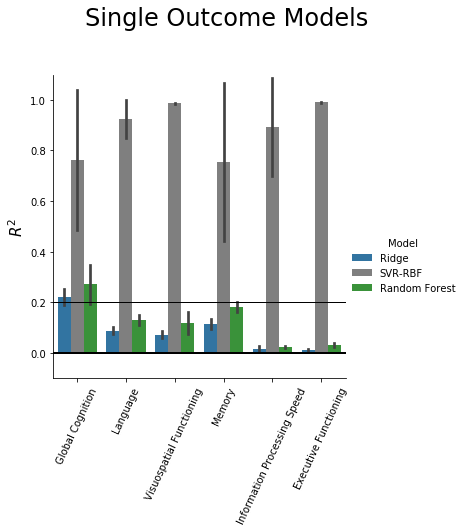

                                                mean       std
Domain                       Model                            
Executive Functioning        Random Forest  0.001326  0.018820
                             Ridge          0.000616  0.001305
                             SVR-RBF       -0.003402  0.004480
Global Cognition             Random Forest  0.094336  0.095743
                             Ridge          0.092083  0.097107
                             SVR-RBF       -0.047830  0.038402
Information Processing Speed Random Forest -0.003361  0.004235
                             Ridge         -0.008677  0.008603
                             SVR-RBF       -0.019107  0.009739
Language                     Random Forest  0.038823  0.032953
                             Ridge          0.024720  0.024361
                             SVR-RBF       -0.025156  0.026754
Memory                       Random Forest  0.074143  0.064789
                             Ridge          0.051800  0

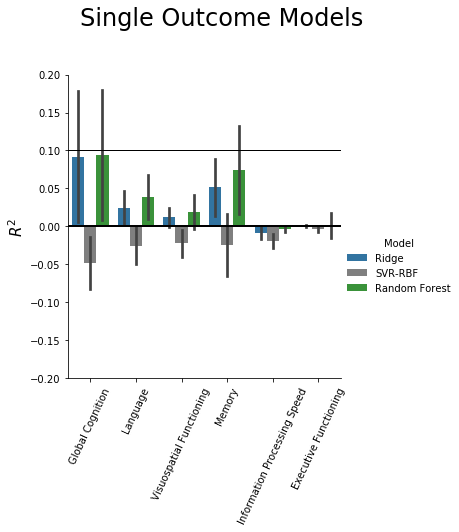

                                                mean       std
Domain                       Model                            
Executive Functioning        Random Forest  0.032617  0.008848
                             Ridge          0.011947  0.004546
                             SVR-RBF        0.989872  0.001082
Global Cognition             Random Forest  0.270876  0.085889
                             Ridge          0.222990  0.035403
                             SVR-RBF        0.762761  0.309910
Information Processing Speed Random Forest  0.024796  0.003819
                             Ridge          0.017945  0.012133
                             SVR-RBF        0.894039  0.216176
Language                     Random Forest  0.129990  0.021810
                             Ridge          0.088071  0.015992
                             SVR-RBF        0.925320  0.084535
Memory                       Random Forest  0.181008  0.023146
                             Ridge          0.114642  0

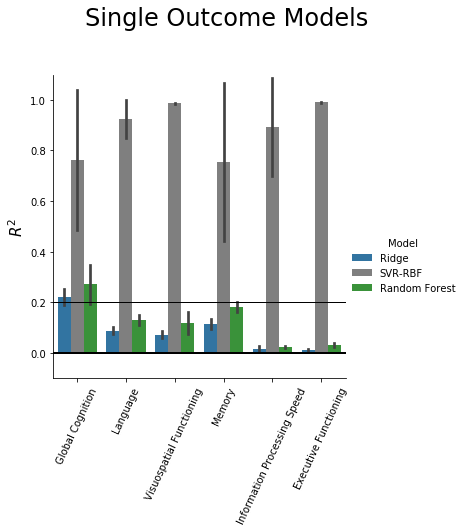

In [92]:
plot_all_scores(scores, "Single Outcome Models")

#### Linear vs Non Linear

                                        mean       std
Domain                       Model                    
Executive Functioning        Ridge  0.011947  0.004546
Global Cognition             Ridge  0.222990  0.035403
Information Processing Speed Ridge  0.017945  0.012133
Language                     Ridge  0.088071  0.015992
Memory                       Ridge  0.114642  0.023397
Visuospatial Functioning     Ridge  0.073257  0.016424


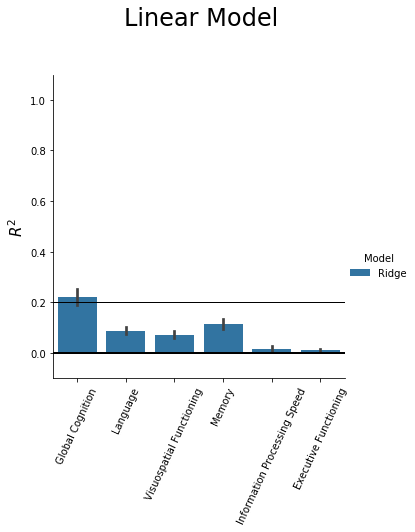

                                        mean       std
Domain                       Model                    
Executive Functioning        Ridge  0.000616  0.001305
Global Cognition             Ridge  0.092083  0.097107
Information Processing Speed Ridge -0.008677  0.008603
Language                     Ridge  0.024720  0.024361
Memory                       Ridge  0.051800  0.042034
Visuospatial Functioning     Ridge  0.012106  0.014307


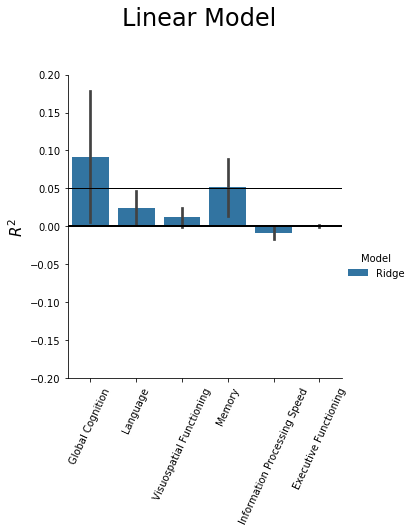

                                        mean       std
Domain                       Model                    
Executive Functioning        Ridge  0.011947  0.004546
Global Cognition             Ridge  0.222990  0.035403
Information Processing Speed Ridge  0.017945  0.012133
Language                     Ridge  0.088071  0.015992
Memory                       Ridge  0.114642  0.023397
Visuospatial Functioning     Ridge  0.073257  0.016424


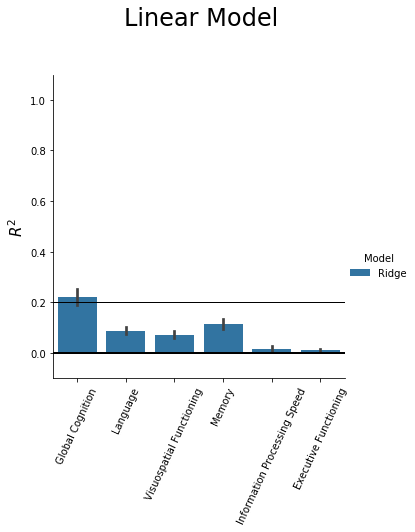

In [100]:
scores_linear = scores[(scores["Model"] == "Ridge")]
plot_all_scores(scores_linear, "Linear Model")

                                                mean       std
Domain                       Model                            
Executive Functioning        Random Forest  0.032617  0.008848
                             SVR-RBF        0.989872  0.001082
Global Cognition             Random Forest  0.270876  0.085889
                             SVR-RBF        0.762761  0.309910
Information Processing Speed Random Forest  0.024796  0.003819
                             SVR-RBF        0.894039  0.216176
Language                     Random Forest  0.129990  0.021810
                             SVR-RBF        0.925320  0.084535
Memory                       Random Forest  0.181008  0.023146
                             SVR-RBF        0.754096  0.348260
Visuospatial Functioning     Random Forest  0.118199  0.047387
                             SVR-RBF        0.986482  0.003008


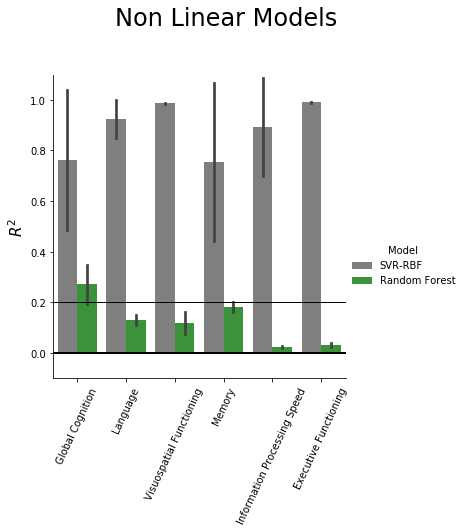

                                                mean       std
Domain                       Model                            
Executive Functioning        Random Forest  0.001326  0.018820
                             SVR-RBF       -0.003402  0.004480
Global Cognition             Random Forest  0.094336  0.095743
                             SVR-RBF       -0.047830  0.038402
Information Processing Speed Random Forest -0.003361  0.004235
                             SVR-RBF       -0.019107  0.009739
Language                     Random Forest  0.038823  0.032953
                             SVR-RBF       -0.025156  0.026754
Memory                       Random Forest  0.074143  0.064789
                             SVR-RBF       -0.024225  0.045819
Visuospatial Functioning     Random Forest  0.019308  0.025230
                             SVR-RBF       -0.022276  0.019349


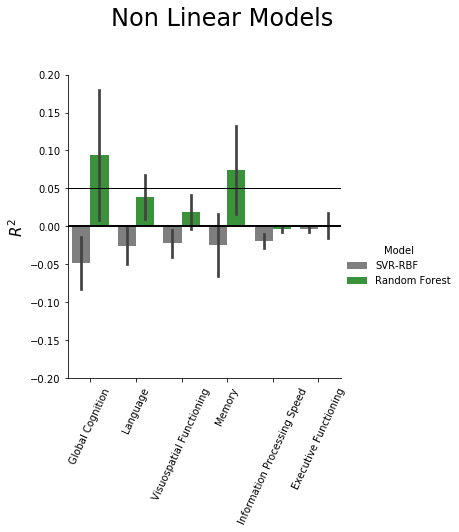

                                                mean       std
Domain                       Model                            
Executive Functioning        Random Forest  0.032617  0.008848
                             SVR-RBF        0.989872  0.001082
Global Cognition             Random Forest  0.270876  0.085889
                             SVR-RBF        0.762761  0.309910
Information Processing Speed Random Forest  0.024796  0.003819
                             SVR-RBF        0.894039  0.216176
Language                     Random Forest  0.129990  0.021810
                             SVR-RBF        0.925320  0.084535
Memory                       Random Forest  0.181008  0.023146
                             SVR-RBF        0.754096  0.348260
Visuospatial Functioning     Random Forest  0.118199  0.047387
                             SVR-RBF        0.986482  0.003008


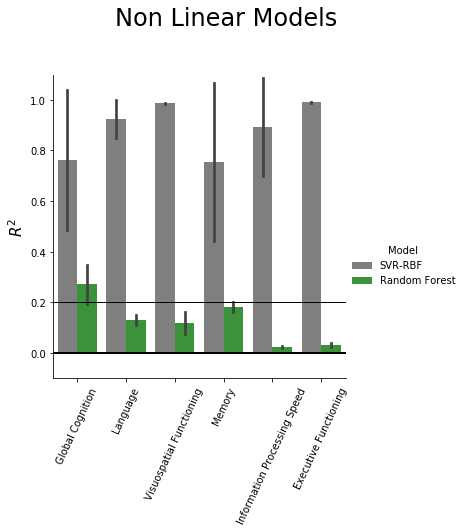

In [101]:
scores_nonlinear = scores[(scores["Model"] != "Ridge")]
plot_all_scores(scores_nonlinear, "Non Linear Models")

## Multi output

In [7]:
# results_path = "/Users/hasnainmamdani/Academics/McGill/thesis/stroke-impairment-analysis/regression/results/unfiltered_all_1401n/"

mridge = pd.read_hdf(results_path + 'multioutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_multioutput_mixup_before_log_mridge_all.h5', key='p', mode='r')
bpmridge = pd.read_hdf(results_path + 'multioutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_multioutput_mixup_before_log_mridge_all.h5', key='p', mode='r')

pls = pd.read_hdf(results_path + 'multioutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_multioutput_mixup_before_log_pls_all.h5', key='p', mode='r')
bppls = pd.read_hdf(results_path + 'multioutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_multioutput_mixup_before_log_pls_all.h5', key='p', mode='r')

cca = pd.read_hdf(results_path + 'multioutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_multioutput_mixup_before_log_cca_all.h5', key='p', mode='r')
bpcca = pd.read_hdf(results_path + 'multioutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_multioutput_mixup_before_log_cca_all.h5', key='p', mode='r')

mrf = pd.read_hdf(results_path + 'multioutput/atlas-llm-with-wm-mixup-before-log/results_atlas_llm_multioutput_mixup_before_log_rf_all.h5', key='p', mode='r')
bpmrf = pd.read_hdf(results_path + 'multioutput/atlas-llm-with-wm-mixup-before-log/best_params_atlas_llm_multioutput_mixup_before_log_rf_all.h5', key='p', mode='r')


In [8]:
mscores = pd.concat([mridge, pls, cca, mrf], ignore_index=True)
mbp = pd.concat([bpmridge, bppls, bpcca, bpmrf], ignore_index=True)

                                                  mean       std
Domain                       Model                              
Executive Functioning        CCA              0.001622  0.002138
                             Multitask Ridge  0.041828  0.002458
                             PLS              0.005100  0.006189
                             Random Forest    0.177130  0.008262
Global Cognition             CCA              0.253453  0.033860
                             Multitask Ridge  0.163258  0.019119
                             PLS              0.125956  0.017718
                             Random Forest    0.371108  0.022404
Information Processing Speed CCA              0.001440  0.001748
                             Multitask Ridge  0.038869  0.007433
                             PLS              0.005076  0.006847
                             Random Forest    0.207207  0.015111
Language                     CCA              0.059522  0.013634
                         

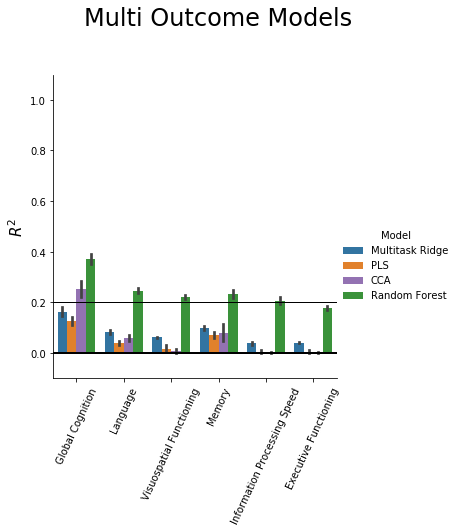

                                                  mean       std
Domain                       Model                              
Executive Functioning        CCA             -0.006138  0.004155
                             Multitask Ridge  0.000511  0.004186
                             PLS             -0.000953  0.005134
                             Random Forest   -0.001691  0.022514
Global Cognition             CCA             -0.346350  0.227122
                             Multitask Ridge  0.096387  0.078137
                             PLS              0.094257  0.091650
                             Random Forest    0.120164  0.101431
Information Processing Speed CCA             -0.009175  0.003646
                             Multitask Ridge -0.009847  0.015538
                             PLS             -0.008064  0.003106
                             Random Forest   -0.023083  0.027197
Language                     CCA             -0.064959  0.026818
                         

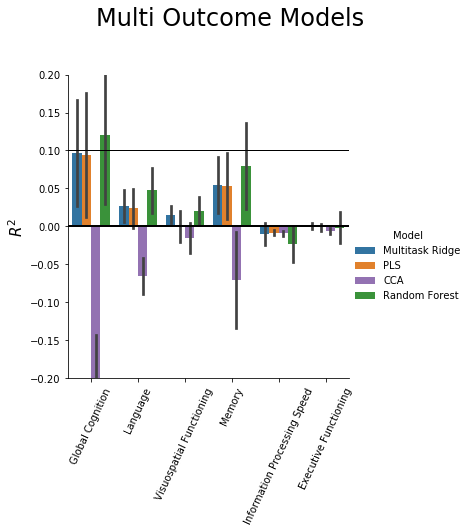

                                                  mean       std
Domain                       Model                              
Executive Functioning        CCA              0.001622  0.002138
                             Multitask Ridge  0.041828  0.002458
                             PLS              0.005100  0.006189
                             Random Forest    0.177130  0.008262
Global Cognition             CCA              0.253453  0.033860
                             Multitask Ridge  0.163258  0.019119
                             PLS              0.125956  0.017718
                             Random Forest    0.371108  0.022404
Information Processing Speed CCA              0.001440  0.001748
                             Multitask Ridge  0.038869  0.007433
                             PLS              0.005076  0.006847
                             Random Forest    0.207207  0.015111
Language                     CCA              0.059522  0.013634
                         

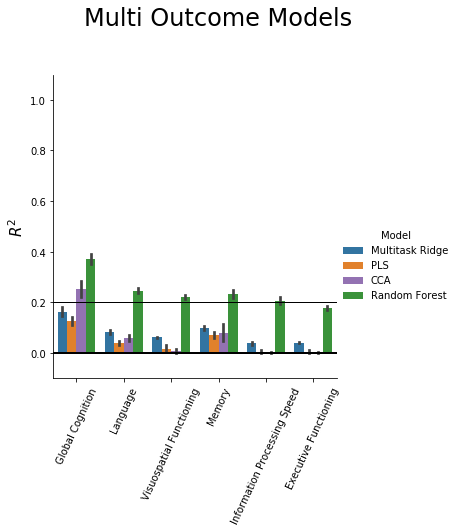

In [17]:
plot_all_scores(mscores, "Multi Outcome Models")

In [23]:
5+8

13

In [24]:
name = "Brigitte"

In [25]:
print("My name is: " + name)

My name is: Brigitte


In [ ]:
model = somelibrary.Ridge()

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
predictions = model.predict(X_test)